In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("dados_limpos.csv", encoding = "latin1", parse_dates=["DATA"])

In [74]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,MAIOR_QUE_100
0,2016,1,ACIR GURGACZ,Aluguel de imóveis,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13,0
1,2016,1,ACIR GURGACZ,Aluguel de imóveis,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18,1
2,2016,1,ACIR GURGACZ,Aluguel de imóveis,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1,1
3,2016,1,ACIR GURGACZ,Aluguel de imóveis,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16,1
4,2016,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1,1


In [75]:
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
DIA                           int64
MAIOR_QUE_100                 int64
dtype: object

In [76]:
# df["DATA"] = pd.to_datetime(df["DATA"]) é equivalente a colocar parse_dates = ["DATA"] nos parametros da funcao read_csv

In [77]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,DIA,MAIOR_QUE_100
count,26691.0,26691.000000,26691.000000,26691.000000,26691.000000
mean,2016.0,6.470908,947.484513,15.431419,0.784085
std,0.0,3.257134,2733.820037,8.847378,0.411464
min,2016.0,1.000000,0.010000,1.000000,0.000000
25%,2016.0,4.000000,124.000000,8.000000,1.000000
50%,2016.0,6.000000,324.790000,15.000000,1.000000
75%,2016.0,9.000000,956.865000,23.000000,1.000000
max,2016.0,12.000000,256980.000000,31.000000,1.000000


In [78]:
df.loc[df["VALOR_REEMBOLSADO"] == 0.01]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,MAIOR_QUE_100
6847,2016,3,FERNANDO BEZERRA COELHO,Passagem,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01,22,0
6848,2016,3,FERNANDO BEZERRA COELHO,Passagem,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01,30,0
11278,2016,6,JORGE VIANA,Passagem,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01,6,0
11494,2016,12,JORGE VIANA,Passagem,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01,17,0
18749,2016,6,PEDRO CHAVES DOS SANTOS FILHO,Passagem,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01,21,0
23302,2016,3,TELMÁRIO MOTA,Passagem,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01,31,0


In [79]:
df.loc[(df["TIPO_DESPESA"] == "Divulgação") & (df["VALOR_REEMBOLSADO"] > 3000)]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,MAIOR_QUE_100
55,2016,4,ACIR GURGACZ,Divulgação,18.114.171/0001-07,HRPP SERVIÇO DE PRODUÇÃO E IMP. DE MATERIAIS L...,5,2016-04-26,Despesa com Divulgação da Atividade Parlamentar,19800.00,26,1
71,2016,5,ACIR GURGACZ,Divulgação,08.154.750/0001-20,SS COMUNICAÇÃO VISUAL LTDA - ME,3987,2016-05-31,Despesa com divulgação da atividade parlamentar,16750.00,31,1
137,2016,9,ACIR GURGACZ,Divulgação,18.114.171/0001-07,HRPP SERVIÇO DE PRODUÇÃO E IMP. DE MATERIAIS L...,12,2016-06-09,Despesa com Divulgação da Atividade Parlamentar,15790.00,9,1
242,2016,5,AÉCIO NEVES,Divulgação,01.773.063/0001-43,GRAFFO - AGENCIA DE NOTICIAS INFOGRAFICAS LTDA...,2016/246,2016-05-24,Divulgação da atividade parlamentar.,4700.00,24,1
431,2016,12,AÉCIO NEVES,Divulgação,01.773.063/0001-43,GRAFFO - AGENCIA DE NOTICIAS INFOGRAFICAS LTDA...,2016/548,2016-12-22,Divulgação da atividade parlamentar.,3850.00,22,1
1429,2016,1,ÂNGELA PORTELA,Divulgação,84.017.888/0001-65,FORBRAS RORAIMA LTDA,11302,2016-04-01,NaN,4200.00,1,1
1451,2016,3,ÂNGELA PORTELA,Divulgação,01.468.484/0001-60,AUTO POSTO CANARINHO,4761,2016-03-29,NaN,4115.60,29,1
1493,2016,6,ÂNGELA PORTELA,Divulgação,84.017.888/0001-65,FORBRAS RORAIMA LTDA,12587,2016-01-06,NaN,4400.00,6,1
1494,2016,6,ÂNGELA PORTELA,Divulgação,84.017.888/0001-65,FORBRAS RORAIMA LTDA,12737,2016-06-16,NaN,16500.00,16,1
1514,2016,7,ÂNGELA PORTELA,Divulgação,03.495.678/0001-80,RADIO E TV TROPICAL,4243,2016-07-18,NaN,5224.00,18,1


In [80]:
gastosDeSenadores = df.groupby("SENADOR")

In [84]:
gastosDeSenadores = gastosDeSenadores["VALOR_REEMBOLSADO"].sum().sort_values(ascending=False)

In [85]:
top_10_senadores = gastosDeSenadores.head(10)

In [86]:
top_10_senadores

SENADOR
DAVI ALCOLUMBRE       510076.07
JOÃO CAPIBERIBE       502997.57
TELMÁRIO MOTA         488678.92
PAULO ROCHA           485114.40
VANESSA GRAZZIOTIN    477079.76
RANDOLFE RODRIGUES    471847.84
SÉRGIO PETECÃO        463456.45
GLADSON CAMELI        459977.83
ROMERO JUCÁ           446448.98
CIRO NOGUEIRA         440047.81
Name: VALOR_REEMBOLSADO, dtype: float64

In [97]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [109]:
plt.style.use("ggplot")

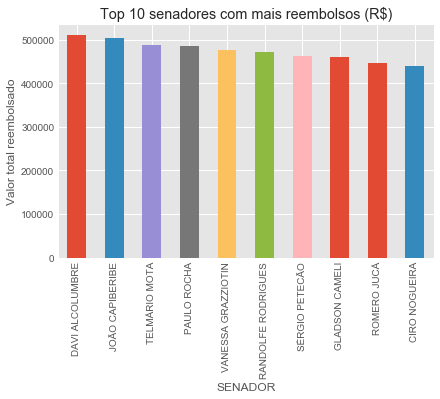

In [122]:
plt.title("Top 10 senadores com mais reembolsos (R$)")
top_10_senadores.plot(kind = "bar")
plt.ylabel("Valor total reembolsado")
plt.show()

In [132]:
gastos_top_10 = df.loc[df["SENADOR"].isin(top_10_senadores.index)]

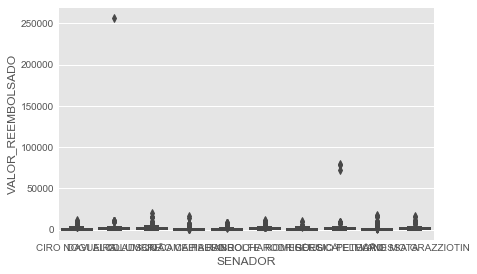

In [133]:
sns.boxplot(x=gastos_top_10["SENADOR"], y=gastos_top_10["VALOR_REEMBOLSADO"])

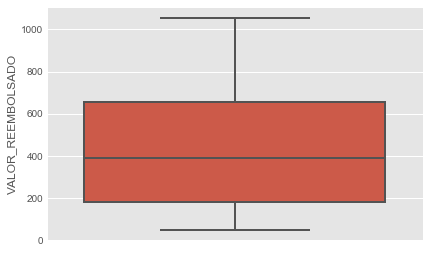

In [149]:
sns.boxplot(x=None, y=df["VALOR_REEMBOLSADO"].tail())

In [190]:
teste = df.loc[df["VALOR_REEMBOLSADO"] < 30000]["VALOR_REEMBOLSADO"]

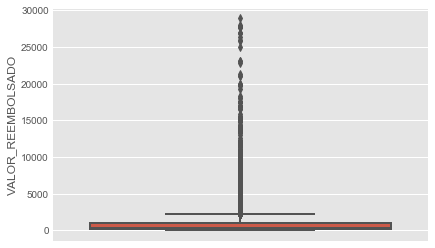

In [191]:
sns.boxplot(x=None, y= teste)

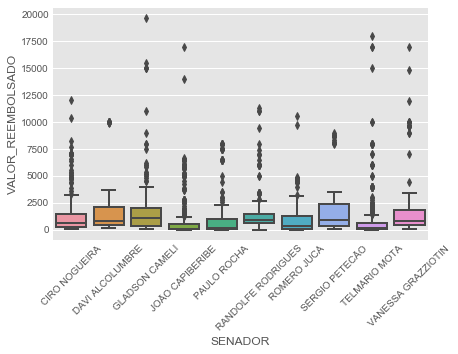

In [196]:
gastos_top_10 = df.loc[(df["SENADOR"].isin(top_10_senadores.index)) & (df["VALOR_REEMBOLSADO"] < 70000)]
sns.boxplot(x=gastos_top_10["SENADOR"], y=gastos_top_10["VALOR_REEMBOLSADO"])
plt.xticks(rotation = 45)
plt.show()


In [193]:
mapa_de_calor = df

In [194]:
mapa_de_calor["DATA"] = df["DATA"].dt.strftime("%Y-%m")

In [215]:
mapa_de_calor.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,MAIOR_QUE_100
0,2016,1,ACIR GURGACZ,Aluguel de imóveis,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01,Despesa com pagamento de energia elétrica para...,73.60,13,0
1,2016,1,ACIR GURGACZ,Aluguel de imóveis,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01,Pagamento de energia elétrica para o escritóri...,206.84,18,1
2,2016,1,ACIR GURGACZ,Aluguel de imóveis,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1,1
3,2016,1,ACIR GURGACZ,Aluguel de imóveis,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01,despesa com pagamento de telefonia para o escr...,407.48,16,1
4,2016,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06,Aquisição de publicação virtual de conteúdo jo...,550.00,1,1


In [216]:
df_pivot = mapa_de_calor.pivot_table(index="DATA",
                                     columns="TIPO_DESPESA",
                                     values = "VALOR_REEMBOLSADO",
                                     aggfunc=np.sum,
                                     fill_value=0)

In [218]:
df_pivot = df_pivot.loc["2016-01":"2016-12"]
df_pivot

TIPO_DESPESA,Aluguel de imóveis,Aquisição de material,Consultoria,Divulgação,Logística,Passagem,Segurança
DATA,,,,,,,
2016-01,681720.72,130287.53,519205.27,419496.30,878387.57,423176.74,284426.09
2016-02,355621.91,103718.82,286143.29,252818.74,592270.58,487826.19,21832.40
2016-03,361367.60,94986.41,255112.80,291705.97,440847.14,586842.49,33859.82
2016-04,392789.93,93684.00,243225.69,224044.85,462819.68,549032.37,21978.24
2016-05,765999.20,80266.83,275629.88,263856.45,476910.51,520546.83,39480.96
2016-06,371057.80,90153.46,219292.74,320627.83,423650.18,624275.09,13873.95
2016-07,306088.26,67689.75,136238.66,200566.67,475541.95,453256.15,7124.31
2016-08,252439.17,78291.64,202764.55,256752.60,420363.64,578393.33,34069.32
2016-09,334052.65,78875.75,107722.85,200740.90,473085.66,469299.83,9194.48


Text(0.5,1,'Gastos agrupados por mês-ano')

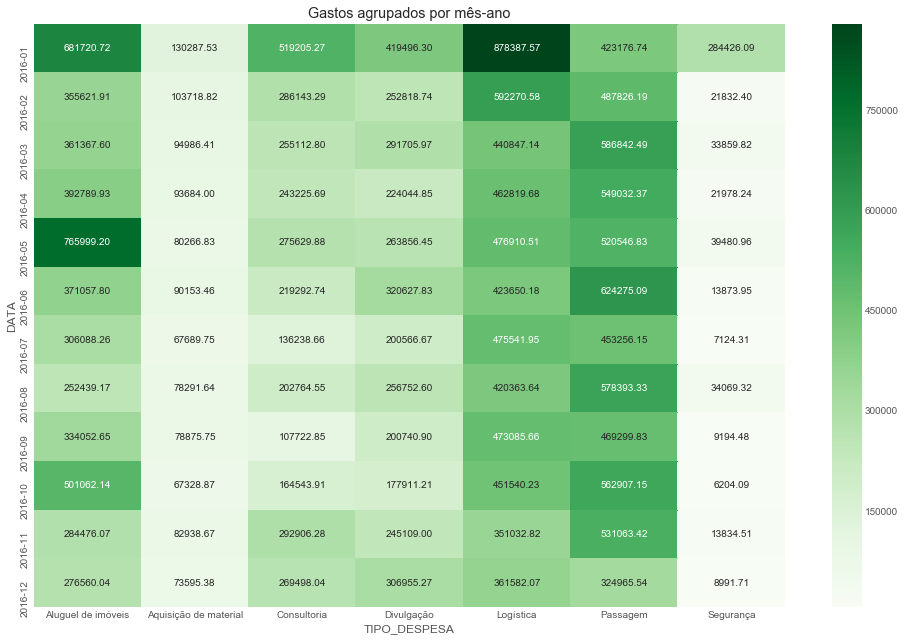

In [222]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_pivot, annot = True, fmt = ".2f", cmap="Greens") #digitar cmap errado mostra as possibilidades de cmap disponíveis
plt.title("Gastos agrupados por mês-ano")